# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&units=metric&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wanning
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | bayanhongor
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | nam som
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | olonkinbyen
Processing Record 12 of Set 1 | ingeniero jacobacci
Processing Record 13 of Set 1 | takamaka
City not found. Skipping...
Processing Record 14 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | pacific grove
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | salalah
Processing Record 20 of Set 1 | turpan
Processing Record 21 o

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wanning,18.8003,110.3967,20.86,89,100,0.88,CN,1706658614
1,puerto ayora,-0.7393,-90.3518,25.66,84,87,4.15,EC,1706658614
2,bayanhongor,46.7167,100.1167,-26.29,80,4,1.55,MN,1706658614
3,adamstown,-25.0660,-130.1015,24.33,78,100,14.37,PN,1706658615
4,waitangi,-43.9535,-176.5597,18.23,97,100,1.79,NZ,1706658615


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wanning,18.8003,110.3967,20.86,89,100,0.88,CN,1706658614
1,puerto ayora,-0.7393,-90.3518,25.66,84,87,4.15,EC,1706658614
2,bayanhongor,46.7167,100.1167,-26.29,80,4,1.55,MN,1706658614
3,adamstown,-25.0660,-130.1015,24.33,78,100,14.37,PN,1706658615
4,waitangi,-43.9535,-176.5597,18.23,97,100,1.79,NZ,1706658615


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

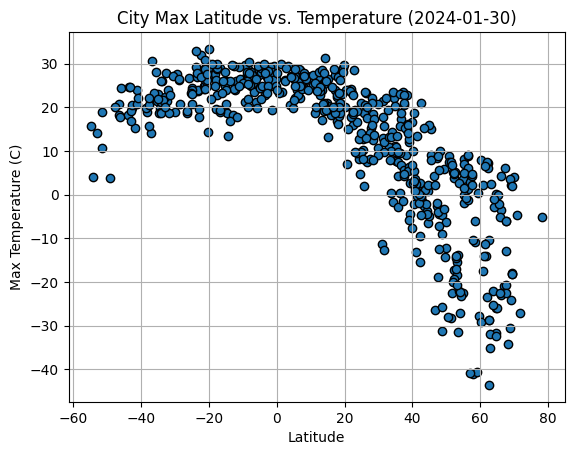

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
# Used time function to convert Unix timestamp into yyyy-mm-dd format (https://docs.python.org/3/library/time.html)
plt.title(f"City Max Latitude vs. Temperature ({time.strftime('%Y-%m-%d', time.gmtime(city_data_df['Date'].max()))})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

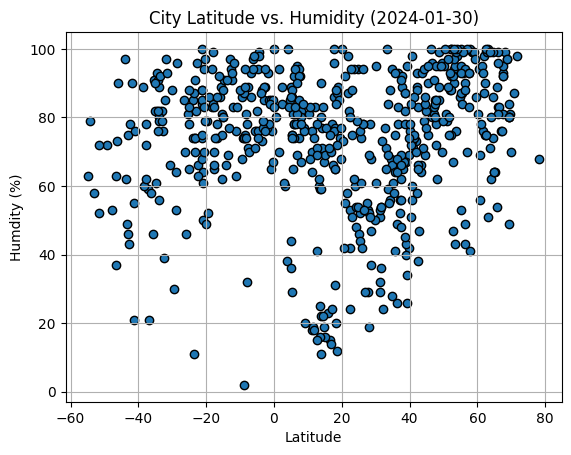

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time.strftime('%Y-%m-%d', time.gmtime(city_data_df['Date'].max()))})")
plt.ylabel("Humdity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

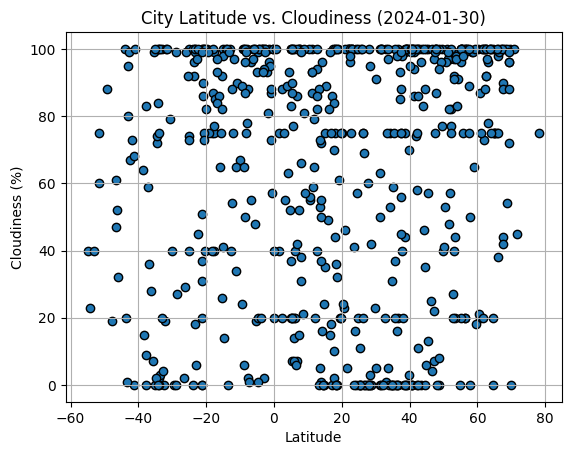

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d', time.gmtime(city_data_df['Date'].max()))})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

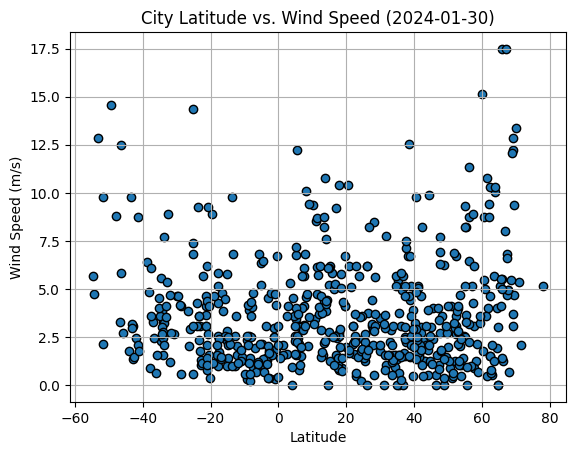

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%Y-%m-%d', time.gmtime(city_data_df['Date'].max()))})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:


# Define a function to create Linear Regression plots
def plotLinReg(x, y, title = "Linear Regression", xlabel = "predictor" , ylabel = "output", xyloc= (1,1)):
    
    #run regression on given data
    [slope, intercept, r_value, p_value, std_err] = linregress(x, y)
    regline = slope*x + intercept

    #create the scatter plot of data
    plt.scatter(x = x, y = y)

    #create the line plot of the regression analysis and include forumala on graph
    plt.plot(x, regline, color = "red")
    plt.annotate(text = f"y = {round(slope,3)}x + {round(intercept,3)}", color = "red", xy = xyloc)

    #create labels and titles for graph
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    #print the r value
    print(f"The r value is {r_value}")

    #show graph
    plt.show()



In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wanning,18.8003,110.3967,20.86,89,100,0.88,CN,1706658614
2,bayanhongor,46.7167,100.1167,-26.29,80,4,1.55,MN,1706658614
5,yellowknife,62.4560,-114.3525,-10.33,99,100,4.63,CA,1706658615
7,nam som,17.7704,102.1895,22.27,86,70,0.78,TH,1706658616
9,talnakh,69.4865,88.3972,-18.22,81,100,4.69,RU,1706658616


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto ayora,-0.7393,-90.3518,25.66,84,87,4.15,EC,1706658614
3,adamstown,-25.0660,-130.1015,24.33,78,100,14.37,PN,1706658615
4,waitangi,-43.9535,-176.5597,18.23,97,100,1.79,NZ,1706658615
6,port-aux-francais,-49.3500,70.2167,3.89,72,88,14.55,TF,1706658615
8,new norfolk,-42.7826,147.0587,19.95,43,99,3.05,AU,1706658616


###  Temperature vs. Latitude Linear Regression Plot

The r value is -0.8164374162292479


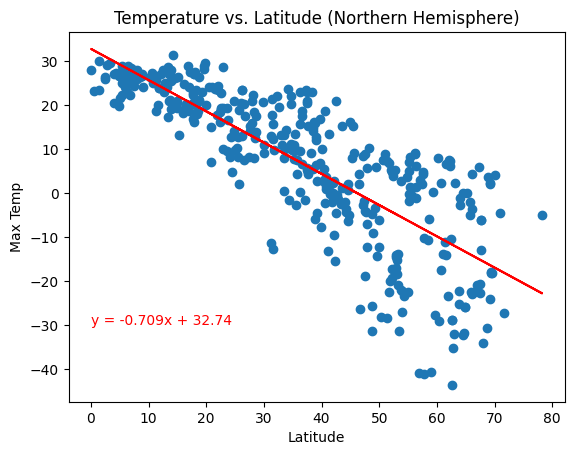

In [34]:
# Linear regression on Northern Hemisphere
plotLinReg(x = northern_hemi_df["Lat"], y = northern_hemi_df["Max Temp"], title = "Temperature vs. Latitude (Northern Hemisphere)", xlabel = "Latitude", ylabel = "Max Temp", xyloc= (0, -30))

The r value is 0.5292358560989029


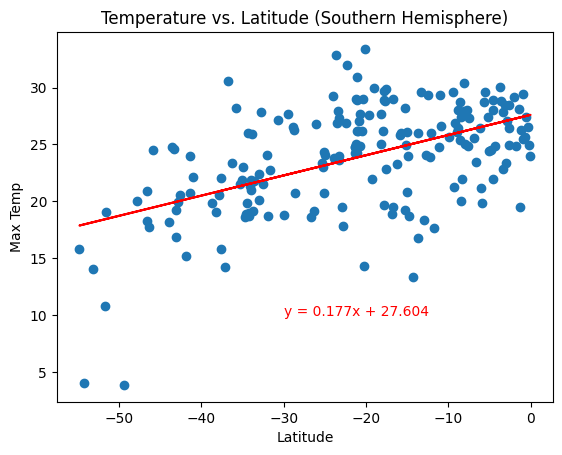

In [35]:
# Linear regression on Southern Hemisphere
plotLinReg(x = southern_hemi_df["Lat"], y = southern_hemi_df["Max Temp"], title = "Temperature vs. Latitude (Southern Hemisphere)", xlabel = "Latitude", ylabel = "Max Temp", xyloc= (-30, 10))

**Discussion about the linear relationship:**  In the Northern Hemisphere, as you go further north, it gets colder; the chart shows that for every step north, it gets about 0.7 degrees cooler. In the Southern Hemisphere, as you go north towards the equator, it gets warmer; for every step in this direction, it gets about 0.2 degrees warmer. 

### Humidity vs. Latitude Linear Regression Plot

The r value is 0.31281470361070585


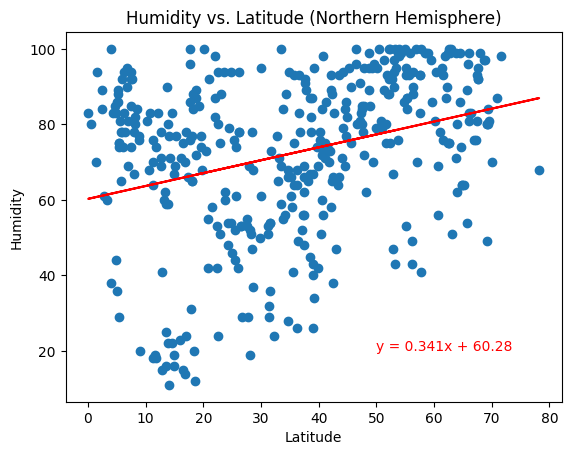

In [36]:
# Northern Hemisphere
plotLinReg(x = northern_hemi_df["Lat"], y = northern_hemi_df["Humidity"], title = "Humidity vs. Latitude (Northern Hemisphere)", xlabel = "Latitude", ylabel = "Humidity", xyloc= (50, 20))

The r value is 0.30681014375346966


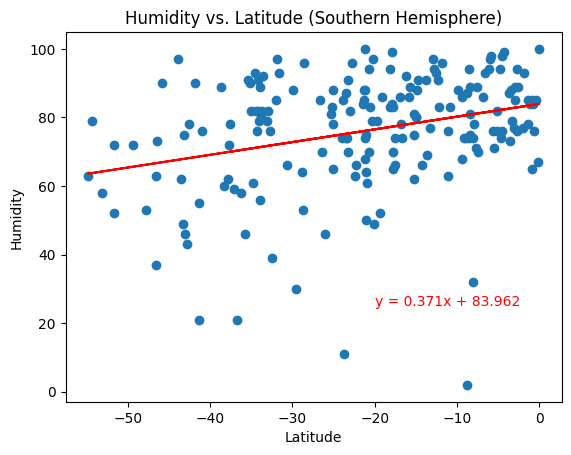

In [37]:
# Southern Hemisphere
plotLinReg(x = southern_hemi_df["Lat"], y = southern_hemi_df["Humidity"], title = "Humidity vs. Latitude (Southern Hemisphere)", xlabel = "Latitude", ylabel = "Humidity", xyloc= (-20, 25))

**Discussion about the linear relationship:** In the Northern Hemisphere, as you go further north away from the equator, the air gets a tiny bit more humid. In the Southern Hemisphere, it's a similar story; as you head north towards the equator, the air also gets slightly more humid. Even though there's a general trend of increasing humidity with distance from the equator, the dots are spread out, meaning that the humidity can be quite different in various places due to other factors like nearby oceans or mountains.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is 0.20706146545214038


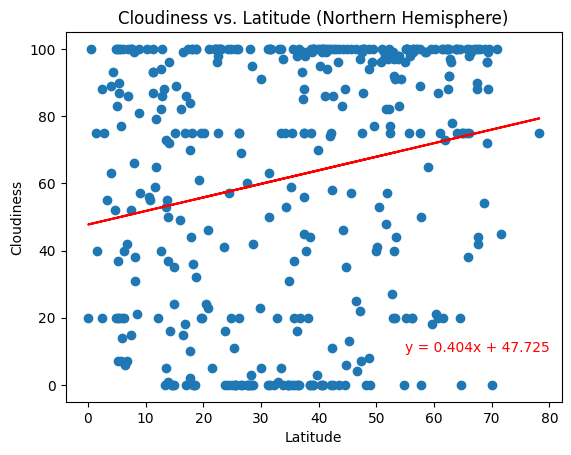

In [38]:
# Northern Hemisphere
plotLinReg(x = northern_hemi_df["Lat"], y = northern_hemi_df["Cloudiness"], title = "Cloudiness vs. Latitude (Northern Hemisphere)", xlabel = "Latitude", ylabel = "Cloudiness", xyloc= (55, 10))

The r value is 0.27894566840397267


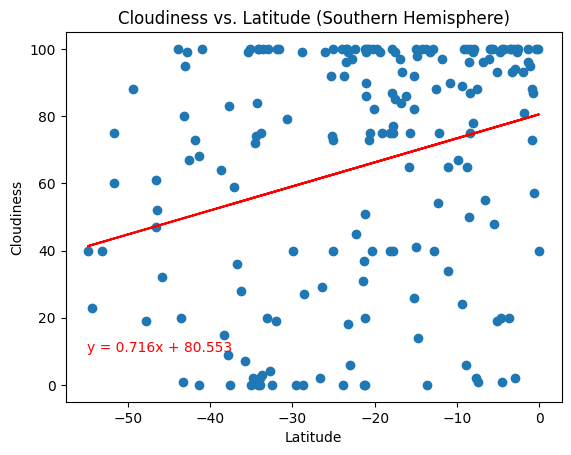

In [39]:
# Southern Hemisphere
plotLinReg(x = southern_hemi_df["Lat"], y = southern_hemi_df["Cloudiness"], title = "Cloudiness vs. Latitude (Southern Hemisphere)", xlabel = "Latitude", ylabel = "Cloudiness", xyloc= (-55, 10))

**Discussion about the linear relationship:** The Northern Hemisphere's chart shows a small upward trend, which suggests that as you move north away from the equator, it gets a bit cloudier. The Southern Hemisphere's chart has a similar pattern. As you go north towards the equator from the southern tip, the cloudiness also increases just a little bit. Both charts have a lot of scattered points, though, which means that there are many places that don't follow the general trend exactly. 

### Wind Speed vs. Latitude Linear Regression Plot

The r value is 0.11139887748917983


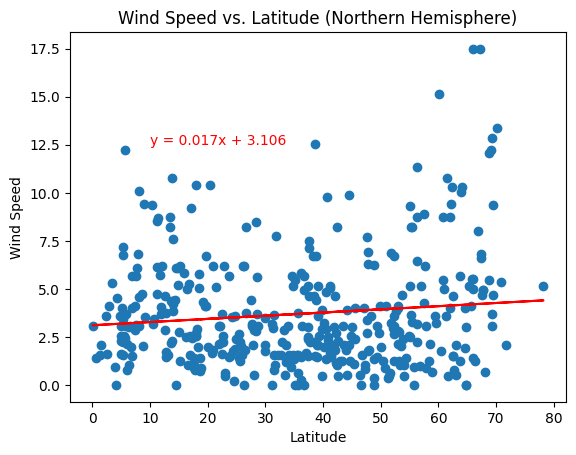

In [40]:
# Northern Hemisphere
plotLinReg(x = northern_hemi_df["Lat"], y = northern_hemi_df["Wind Speed"], title = "Wind Speed vs. Latitude (Northern Hemisphere)", xlabel = "Latitude", ylabel = "Wind Speed", xyloc= (10, 12.5))

The r value is -0.3533658111662891


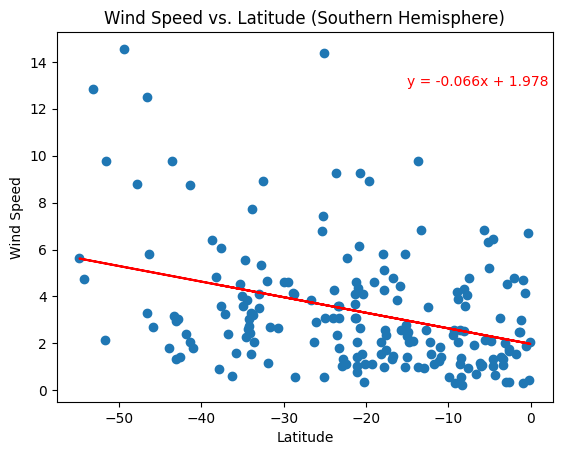

In [41]:
# Southern Hemisphere
plotLinReg(x = southern_hemi_df["Lat"], y = southern_hemi_df["Wind Speed"], title = "Wind Speed vs. Latitude (Southern Hemisphere)", xlabel = "Latitude", ylabel = "Wind Speed", xyloc= (-15, 13))

**Discussion about the linear relationship:** In the Northern Hemisphere, the wind speed doesn't really change much no matter how far north you go. The line on the chart is almost straight, showing that distance from the equator doesn't make a big difference to the wind speed.In the Southern Hemisphere, the chart suggests that as you get closer to the equator, the wind isn't blowing as hard. The line goes down a little bit, meaning there's a slight drop in wind speed as you head north. Since, the dots are scattered all over the charts, it shows that the story isn't the same everywhere, lots of other things, like the shape of the land and weather patterns, also affect how fast the wind blows.